# PREPROCESSING

In [1]:
import pandas as pd
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

#for 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
#pd.options.plotting.backend = "plotly"

from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Timedoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#baca data
df = pd.read_csv('dataset-tokoh-indo.csv')
df.head()

,text,label
0,sumpah ini gue baru aja ngeliat fans nya agnes...,-1
1,@myxynerva coba dengerin lagunya agnes mo yg p...,0
2,@aewin86 Agnes mo #siBungsu \nNgasal banget ak...,0
3,nah mangkanya stream lagu indo atau western aj...,0
4,Agnez Mo tapi (Waktu Jadi Agnes Monica) https:...,0


In [3]:
#ganti label jadi -1.0 , 0.0m dan 1.0
df['label'] = df['label'].map({-1: -1.0, 0: 0.0, 1:1.0})
df.head()

,text,label
0,sumpah ini gue baru aja ngeliat fans nya agnes...,-1.0
1,@myxynerva coba dengerin lagunya agnes mo yg p...,0.0
2,@aewin86 Agnes mo #siBungsu \nNgasal banget ak...,0.0
3,nah mangkanya stream lagu indo atau western aj...,0.0
4,Agnez Mo tapi (Waktu Jadi Agnes Monica) https:...,0.0


In [4]:
#cek kolom yang kosong
df.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
#ganti lagi label jadi negative, pos, net
df['label'] = df['label'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df.head()

,text,label
0,sumpah ini gue baru aja ngeliat fans nya agnes...,Negative
1,@myxynerva coba dengerin lagunya agnes mo yg p...,Neutral
2,@aewin86 Agnes mo #siBungsu \nNgasal banget ak...,Neutral
3,nah mangkanya stream lagu indo atau western aj...,Neutral
4,Agnez Mo tapi (Waktu Jadi Agnes Monica) https:...,Neutral


<AxesSubplot:xlabel='label'>

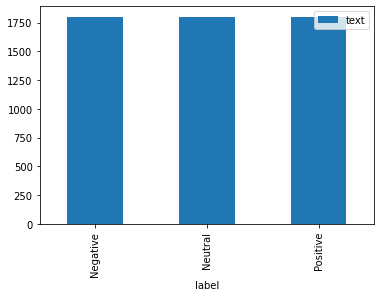

In [6]:
# grafik jumlah data perlabel
df.groupby('label').count().plot(kind='bar')

<AxesSubplot:>

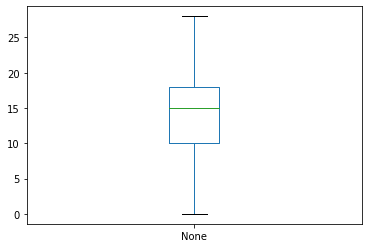

In [7]:
# kalkulasi panjang text
tweet_len = pd.Series([len(tweet.split()) for tweet in df['text']])

# distribusi panjang text
tweet_len.plot(kind='box')

In [8]:
 #emoticon code
regrex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

In [9]:
#function preprocessing 
''' Convert tweet text into a sequence of words '''
def tweet_to_words(text):
    
    # remove non letters
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r"[!@#$-()\"#/@;:<>{}=~|.?,‘’\\]", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = regrex_pattern.sub(r'',text)

    text = text.replace('\n', ' ') # replace new line into space
    # text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    # tokenize
    # text to lowercase
    text = text.lower()
    #remove keywords
    removal_list = ["agnes", "mo", "agnez","ahok",
                    "anies", "baswedan","bintang",
                    "emon","chef","juna","cinta",
                    "laura","maudy","ayunda","sherina"
                    ,"munaf","isyana","dian","sastro",
                    "najwa","shihab","bu","risma","susi",
                    "pudjiastuti","sri","mulyani","nadiem"
                    ,"makarim","deddy","corbuzier","raffi",
                    "ahmad","dr","tirta","jerome","polin"]
    string_as_list = text.split()
    final_list = [word for word in string_as_list if word not in removal_list]
    text = ' '.join(final_list)
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("indonesian")]
    # apply stemming
    # words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['text'][1])
print("\nProcessed tweet ->", tweet_to_words(df['text'][1]))


Original tweet -> @myxynerva coba dengerin lagunya agnes mo yg pas thun 2000an

Processed tweet -> ['coba', 'dengerin', 'lagunya', 'yg', 'pas', 'thun', 'an']


In [10]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['text']))
X[555]

['kaga', 'lucu']

In [11]:
X[555]

['kaga', 'lucu']

In [12]:

'''This approach is very simple and it involves converting each value in a column to a number. '''
# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['label'])
Y

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
print('Negative')
print('------------')
print(X[0])
print(Y[0])
print('------------')
print('Neutral')
print('------------')
print(X[1])
print(Y[1])

print('------------')
print('Positive')
print('------------')
print(X[5])
print(Y[5])

Negative
------------
['sumpah', 'gue', 'aja', 'ngeliat', 'fans', 'nya', 'nge', 'war', 'tl']
0
------------
Neutral
------------
['coba', 'dengerin', 'lagunya', 'yg', 'pas', 'thun', 'an']
1
------------
Positive
------------
['kak', 'cantik', 'bgt']
2


# BUILD MODEL

In [14]:
# For Building the model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

import pickle
import seaborn as sns
import numpy as np

import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
#Split data train and test
y = pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [16]:
vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size, preprocessor=lambda x: x,tokenizer=lambda x: x) 

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [17]:
print(count_vector.get_feature_names()[500:1000])

['asem', 'aset', 'aset…', 'asi', 'asiiik', 'asik', 'asikk', 'asikkk', 'asing', 'asisten', 'asjksjdsk', 'askara', 'asli', 'aslii', 'aslik', 'aslinya', 'asmara', 'aspek', 'assalamualaikum', 'astaga', 'astagaaa', 'astra', 'asu', 'asuh', 'asuhan', 'asumsi', 'at', 'atasi', 'atau…', 'atawa', 'ata…', 'ateis', 'atlet', 'ats…', 'atta', 'attack', 'atur', 'aturan', 'atuy', 'atw', 'at…', 'au', 'auda', 'audah', 'audrey', 'aula', 'aura', 'auranya', 'aurat', 'auto', 'automatis', 'award', 'awas', 'awet', 'ayah', 'ayahhhhhhhh', 'ayam', 'ayat', 'ayo', 'ayok', 'ayooo', 'ayundajerome', 'ayundasherina', 'ayunda—punya', 'ay…', 'azab', 'azis', 'azriel', 'a…', 'b', 'ba', 'bab', 'babak', 'babe', 'babel', 'babi', 'babibegudal', 'bablas', 'babycam', 'baca', 'baca-baca', 'bacaan', 'bacanya', 'bacanya…', 'backing-annya', 'backingannya', 'bacod', 'bacot', 'bacotan', 'bacotnya', 'badan', 'badannya', 'bade', 'bae', 'bag', 'bagaslah', 'bagi-bagi', 'bagikan', 'baginya', 'bagi²', 'bagong', 'bagoosss', 'bagus', 'bagusin'

C:\Users\Timedoor\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


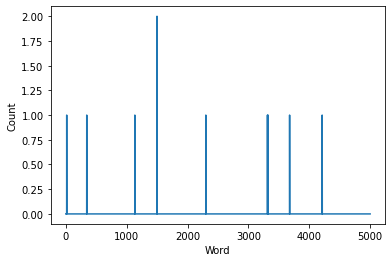

In [18]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [19]:


max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][1107])
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[555])


Before Tokenization & Padding 
 Aku Bangga sama Om Deddy Corbuzier keren banget dia multitalenta bangettt
#Deddy
After Tokenization & Padding 
 [  40   51 1168  539    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [20]:


# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [21]:
y = pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (3240, 50) (3240, 3)
Validation Set -> (1080, 50) (1080, 3)
Test Set -> (1080, 50) (1080, 3)


In [22]:
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History

from tensorflow.keras import losses

vocab_size = 5000
embedding_size = 64
epochs=10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

C:\Users\Timedoor\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [46]:
print(model.summary())
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 32
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 64)            320000    
                                                                 
 conv1d_4 (Conv1D)           (None, 50, 32)            6176      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 3)                

In [47]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6287
Precision : 0.7235
Recall    : 0.4676
F1 Score  : 0.5681


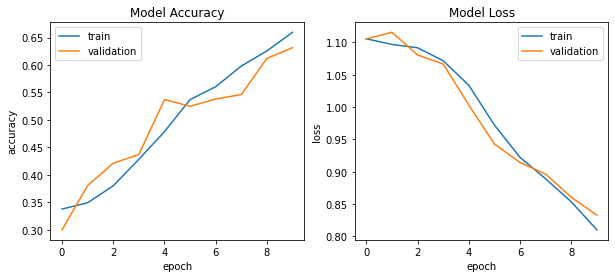

In [48]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

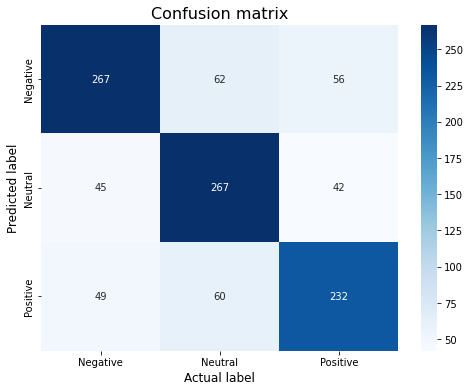

In [40]:

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [28]:
# Save the model architecture & the weights
model.save('PredictData/best_model.h5')
print('Best model saved')

Best model saved


In [29]:
from tensorflow.keras.models import load_model

# Load model
model = load_model('PredictData/best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])
    return sentiment_classes[yt[0]]

In [30]:
tweet =[['Ini keren banget bukunya dian sastro'], ['Mau nonton konser Isyana'], ['Jaman ahok jakarta banjir terus']]
print('Tweet : ',tweet[0])
predict_class(tweet[0])
print('\n')
print('Tweet : ',tweet[1])
predict_class(tweet[1])
print('\n')
print('Tweet : ',tweet[2])
predict_class(tweet[2])
print('\n')


Tweet :  ['Ini keren banget bukunya dian sastro']
The predicted sentiment is Positive


Tweet :  ['Mau nonton konser Isyana']
The predicted sentiment is Neutral


Tweet :  ['Jaman ahok jakarta banjir terus']
The predicted sentiment is Negative


